<a href="https://colab.research.google.com/github/vtecftwy/fastbook/blob/master/wip%20nbs/04_url_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 8.0MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 1.2MB 13.4MB/s 
     |████████████████████████████████| 194kB 47.4MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 12.8MB 226kB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
p = untar_data(URLs.CARS)

In [43]:
Path.BASE_PATH = p

In [44]:
p.ls()

(#3) [Path('cars_test'),Path('cars_train'),Path('cars_annos.mat')]

In [45]:
(p / 'cars_train').ls().sorted()

(#8144) [Path('cars_train/00001.jpg'),Path('cars_train/00002.jpg'),Path('cars_train/00003.jpg'),Path('cars_train/00004.jpg'),Path('cars_train/00005.jpg'),Path('cars_train/00006.jpg'),Path('cars_train/00007.jpg'),Path('cars_train/00008.jpg'),Path('cars_train/00009.jpg'),Path('cars_train/00010.jpg')...]

In [46]:
(p / 'cars_test').ls().sorted()

(#8041) [Path('cars_test/00001.jpg'),Path('cars_test/00002.jpg'),Path('cars_test/00003.jpg'),Path('cars_test/00004.jpg'),Path('cars_test/00005.jpg'),Path('cars_test/00006.jpg'),Path('cars_test/00007.jpg'),Path('cars_test/00008.jpg'),Path('cars_test/00009.jpg'),Path('cars_test/00010.jpg')...]

In [6]:
anns = p / 'cars_annos.mat'
anns.is_file()

True

In [79]:
import scipy.io
mat = scipy.io.loadmat(anns)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'annotations', 'class_names'])

In [9]:
m = mat['annotations']

In [10]:
m.shape

(1, 16185)

In [48]:
m[0, 0]

(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8))

In [24]:
m[0,0][0], m[0,0][-2]

(array(['car_ims/000001.jpg'], dtype='<U18'), array([[1]], dtype=uint8))

In [29]:
m.shape, m[0,:].shape

((1, 16185), (16185,))

In [38]:
m[0,:]

array([(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
       ...,
       (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dtype=uint16), array([[196]], dtype=uint8), array([[1]], dtype=uint8)),
       (array(['car_ims/016184.jpg'], dtype='<U18'), array([[56]], dtype=uint8), array([[60]],

In [ ]:
[('nnnnn.jpg', 1, True)]

In [154]:
# l = [(row[0].item()[-12:], row[-2].item(), row[-1].item()) for row in m[0, -10:]]
l = [(row[0].item()[-9:], row[-2].item(), row[-1].item()) for row in m[0, :] ]
l

[('00001.jpg', 1, 0),
 ('00002.jpg', 1, 0),
 ('00003.jpg', 1, 0),
 ('00004.jpg', 1, 0),
 ('00005.jpg', 1, 0),
 ('00006.jpg', 1, 0),
 ('00007.jpg', 1, 0),
 ('00008.jpg', 1, 0),
 ('00009.jpg', 1, 0),
 ('00010.jpg', 1, 0),
 ('00011.jpg', 1, 0),
 ('00012.jpg', 1, 0),
 ('00013.jpg', 1, 0),
 ('00014.jpg', 1, 0),
 ('00015.jpg', 1, 0),
 ('00016.jpg', 1, 0),
 ('00017.jpg', 1, 0),
 ('00018.jpg', 1, 0),
 ('00019.jpg', 1, 0),
 ('00020.jpg', 1, 0),
 ('00021.jpg', 1, 0),
 ('00022.jpg', 1, 0),
 ('00023.jpg', 1, 0),
 ('00024.jpg', 1, 0),
 ('00025.jpg', 1, 0),
 ('00026.jpg', 1, 0),
 ('00027.jpg', 1, 0),
 ('00028.jpg', 1, 0),
 ('00029.jpg', 1, 0),
 ('00030.jpg', 1, 0),
 ('00031.jpg', 1, 0),
 ('00032.jpg', 1, 0),
 ('00033.jpg', 1, 0),
 ('00034.jpg', 1, 0),
 ('00035.jpg', 1, 0),
 ('00036.jpg', 1, 0),
 ('00037.jpg', 1, 0),
 ('00038.jpg', 1, 0),
 ('00039.jpg', 1, 0),
 ('00040.jpg', 1, 0),
 ('00041.jpg', 1, 0),
 ('00042.jpg', 1, 0),
 ('00043.jpg', 1, 0),
 ('00044.jpg', 1, 0),
 ('00045.jpg', 1, 0),
 ('00046.j

In [147]:
p_list_train[0:10]

(#10) [Path('cars_train/00001.jpg'),Path('cars_train/00002.jpg'),Path('cars_train/00003.jpg'),Path('cars_train/00004.jpg'),Path('cars_train/00005.jpg'),Path('cars_train/00006.jpg'),Path('cars_train/00007.jpg'),Path('cars_train/00008.jpg'),Path('cars_train/00009.jpg'),Path('cars_train/00010.jpg')]

In [146]:
 p_list_valid[0:10]

(#10) [Path('cars_test/00001.jpg'),Path('cars_test/00002.jpg'),Path('cars_test/00003.jpg'),Path('cars_test/00004.jpg'),Path('cars_test/00005.jpg'),Path('cars_test/00006.jpg'),Path('cars_test/00007.jpg'),Path('cars_test/00008.jpg'),Path('cars_test/00009.jpg'),Path('cars_test/00010.jpg')]

In [157]:
df = pd.DataFrame(data=l, columns=['name', 'label', 'is_valid'])
display(df.shape)
df_train = df.loc[df.is_valid==0]
df_valid = df.loc[df.is_valid==1]
display(df_train.shape, df_valid.shape)
display(df_train.head())
display(df_valid.head())
display(df.head(50))

(16185, 3)

(8144, 3)

(8041, 3)

,name,label,is_valid
0,00001.jpg,1,0
1,00002.jpg,1,0
2,00003.jpg,1,0
3,00004.jpg,1,0
4,00005.jpg,1,0


,name,label,is_valid
45,00046.jpg,1,1
46,00047.jpg,1,1
47,00048.jpg,1,1
48,00049.jpg,1,1
49,00050.jpg,1,1


,name,label,is_valid
0,00001.jpg,1,0
1,00002.jpg,1,0
2,00003.jpg,1,0
3,00004.jpg,1,0
4,00005.jpg,1,0
5,00006.jpg,1,0
6,00007.jpg,1,0
7,00008.jpg,1,0
8,00009.jpg,1,0
9,00010.jpg,1,0


In [120]:
def is_in_ds(name):
    return name in img_name_list

In [122]:
is_in_ds('00001.jpg'), is_in_ds('10544.jpg')

(True, False)

In [133]:
mask = df.name.apply(is_in_ds)
mask.shape

(8144,)

In [135]:
df = df.loc[mask]
df.loc[df.is_valid==0].shape

(4114, 3)

https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_df

In [94]:
dls = ImageDataLoaders.from_df(df_train, p, folder='cars_train', valid_col='is_valid')

In [95]:
dls.show_batch()

FileNotFoundError: ignored

In [96]:
df_train.loc[df_train.name=='10544.jpg']

,name,label,is_valid
10543,10544.jpg,128,0


In [131]:
p_list_train = (p /'cars_train').ls().sorted()
p_list_valid = (p /'cars_test').ls().sorted()
p_list = p_list_train + p_list_valid
display(len(p_list))
img_name_list = [p.name for p in p_list]
display(len(img_name_list))

16185

16185

In [105]:
'10544' in [pa.name for pa in p_list_train], '10544' in [pa.name for pa in p_list_valid], 

(False, False)

In [84]:
dls.dataset.train[]

(#5) [(PILImage mode=RGB size=600x400, TensorCategory(0)),(PILImage mode=RGB size=900x675, TensorCategory(0)),(PILImage mode=RGB size=640x480, TensorCategory(0)),(PILImage mode=RGB size=2100x1386, TensorCategory(0)),(PILImage mode=RGB size=144x108, TensorCategory(0))]

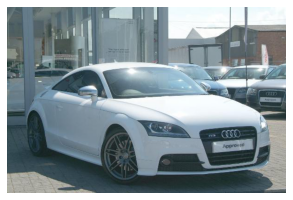

In [76]:
show_image(dls.dataset[0][0])

In [83]:
mat['class_names'][0,0]

array(['AM General Hummer SUV 2000'], dtype='<U26')

# Rerun Chapter 4 with the full MNIST dataset

## Load full MNIST dataset

We are try to rerun the two classifiers built before to classify images as a 3 or a 7, but using the full dataset with 10 digits. So let's download the full MNIST datasets:

In [ ]:
path = untar_data(URLs.MNIST)    # Full dataset (0s to 9s)

In [ ]:
Path.BASE_PATH = path

We can see what's in this directory by using `ls`, a method added by fastai. This method returns an object of a special fastai class called `L`, which has all the same functionality of Python's built-in `list`, plus a lot more. One of its handy features is that, when printed, it displays the count of items, before listing the items themselves (if there are more than 10 items, it just shows the first few):

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation set (and/or test set). Note, though, that the names of both image folders have changed: `train` into `training` and `valid` into `testing`. Keep this in mind when you look for images in the code below.

Let's see what's inside the training set:

In [ ]:
(path/'training').ls()

(#10) [Path('training/4'),Path('training/8'),Path('training/3'),Path('training/5'),Path('training/0'),Path('training/2'),Path('training/7'),Path('training/1'),Path('training/9'),Path('training/6')]

There's a folder for each digit from 0s to 9s. Let's take a look in one of these folders (using `sorted` to ensure we all get the same order of files). To do so, it is convenient to use a `dict`, indexed by the digit (0 -> 9). It prevents us from creating 10 different variables and from writing 10 times tvery similar code. We also could use a list of lists.
``` python
    paths_dict = {0: [list of the paths to images of 0],
                  1: [list of the paths to images of 1],

                  i: [list of the paths to images of i],

                  9: [list of the paths to images of 9],
                 }
```

In [ ]:
paths_dict = {}         # Create an empty dictionary to hold the paths list for each digit
for i in range(10):
    paths_dict[i] = (path/'training'/f"{i}").ls().sorted()   # add the list of path for digit i to the dict

paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

Let’s take a look at one image for each of the digits:

In [ ]:
for i in range(10):
    img_paths = paths_dict[i][3]
    img = Image.open(img_paths)
    display(img)

We can store the image in a tensor and slice it to pick some part of the image. We then use a Pandas DataFrame to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values:

## Baseline model: Pixel Similarity

So, here is a first idea: how about we find the average pixel value for every pixel for each digit (0 to 9). Then, to classify an image as one digit or the other, we see which of these ideal digits the image is most similar to. This certainly seems like it should be better than nothing, so it will make a good baseline.

Step one for our simple model is to get the average of pixel values for the groups of images for each pixel.

Let's create a tensor containing all of the images representing a single digit, stacked together. We use the same list comnprehension as in `04_mnist_basic`. But since we have 10 groups, we again use a dictionary indexed with the digit 0 to 9, to hold the stacked images, instead of 10 variables. You also can use a list of tensors here. There are also other methods that may be faster.

In [ ]:
tensors_dict = {}
for i in range(10):
    tensors_dict[i] = [tensor(Image.open(o)) for o in paths_dict[i]]

In [ ]:
# Show the number of images for each digit
print(f'Total number of images: {sum([len(v) for k, v in tensors_dict.items()]):,d}')
display([f"{len(v):,d} images for {k}" for k, v in tensors_dict.items()])


Total number of images: 60,000


['5,923 images for 0',
 '6,742 images for 1',
 '5,958 images for 2',
 '6,131 images for 3',
 '5,842 images for 4',
 '5,421 images for 5',
 '5,918 images for 6',
 '6,265 images for 7',
 '5,851 images for 8',
 '5,949 images for 9']

We'll also check that one of the images looks okay. Since we now have tensors (which Jupyter by default will print as values), rather than PIL images (which Jupyter by default will display as images), we need to use fastai's `show_image` function to display it:

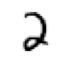

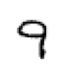

In [ ]:
show_image(tensors_dict[2][1])
show_image(tensors_dict[9][1]);

For every pixel position, we want to compute the average over all the images of the intensity of that pixel. To do this we first combine all the images in this list into a single three-dimensional tensor. The most common way to describe such a tensor is to call it a *rank-3 tensor*. We often need to stack up individual tensors in a collection into a single tensor. Unsurprisingly, PyTorch comes with a function called `stack` that we can use for this purpose.

Some operations in PyTorch, such as taking a mean, require us to *cast* our integer types to float types. Since we'll be needing this later, we'll also cast our stacked tensor to `float` now. Casting in PyTorch is as simple as typing the name of the type you wish to cast to, and treating it as a method.

Generally when images are floats, the pixel values are expected to be between 0 and 1, so we will also divide by 255 here:

In [ ]:
# Calculate the stacked tensor for each of the digit and store that tensor in a dictionary index by digit
stacked_tensors_dict = {}
for digit, img_tensor in tensors_dict.items():
    stacked_tensors_dict[digit] = torch.stack(img_tensor).float()/255

Perhaps the most important attribute of a tensor is its *shape*. This tells you the length of each axis. In this case, we can see that we have around 6,000 images for each digit, each image of size 28×28 pixels. There is nothing specifically about this tensor that says that the first axis is the number of images, the second is the height, and the third is the width—the semantics of a tensor are entirely up to us, and how we construct it. As far as PyTorch is concerned, it is just a bunch of numbers in memory.

In [ ]:
print('Shapes of image tensor for each digit:')
for digit, img_tensor in stacked_tensors_dict.items():
    print('   ', digit, ': ', stacked_tensors_dict[digit].shape)

Shapes of image tensor for each digit:
    0 :  torch.Size([5923, 28, 28])
    1 :  torch.Size([6742, 28, 28])
    2 :  torch.Size([5958, 28, 28])
    3 :  torch.Size([6131, 28, 28])
    4 :  torch.Size([5842, 28, 28])
    5 :  torch.Size([5421, 28, 28])
    6 :  torch.Size([5918, 28, 28])
    7 :  torch.Size([6265, 28, 28])
    8 :  torch.Size([5851, 28, 28])
    9 :  torch.Size([5949, 28, 28])


Finally, we can compute what the ideal digit image looks like. We calculate the mean of all the image tensors by taking the mean along dimension 0 of our stacked, rank-3 tensor. This is the dimension that indexes over all the images.

In other words, for every pixel position, this will compute the average of that pixel over all images. The result will be one value for every pixel position, or a single image. Here it is:

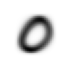

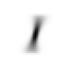

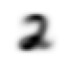

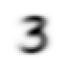

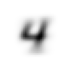

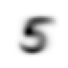

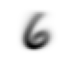

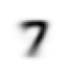

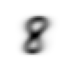

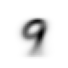

In [ ]:
means_dict = {}
for digit, tnsr in stacked_tensors_dict.items():
    means_dict[digit] = stacked_tensors_dict[digit].mean(0)
    show_image(means_dict[digit])

According to this dataset, these are the ideal images for each of the digits

Let's now pick an arbitrary 3 and measure its *distance* from our "ideal digits."

> **Stop and Think!**: How would you calculate how similar a particular image is to each of our ideal digits? Remember to step away from this book and jot down some ideas before you move on! Research shows that recall and understanding improves dramatically when you are engaged with the learning process by solving problems, experimenting, and trying new ideas yourself

Here's a sample image of one digit:

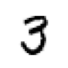

In [ ]:
selected_digit = 3
img = stacked_tensors_dict[selected_digit][2]
show_image(img);

Let's compare again our Mean Absolute Error (MAE) and Mean Square Error (MSE)

In [ ]:
dist_3_mae = (img - means_dict[3]).abs().mean()
dist_3_mse = ((img - means_dict[3])**2).mean().sqrt()
dist_3_mae, dist_3_mse

(tensor(0.1100), tensor(0.1980))

In [ ]:
dist_7_mae = (img - means_dict[7]).abs().mean()
dist_7_mse = ((img - means_dict[7])**2).mean().sqrt()
dist_7_mae, dist_7_mse

(tensor(0.1541), tensor(0.2974))

Let's visualize what these distances mean:

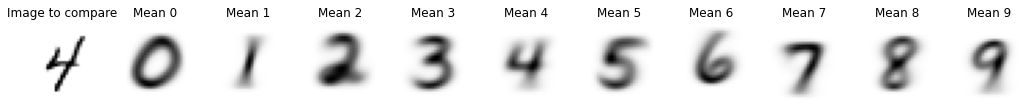


Simple Difference:


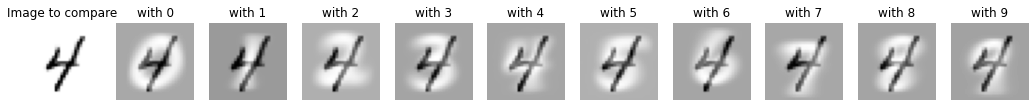


MAE - Mean Absolute Error:


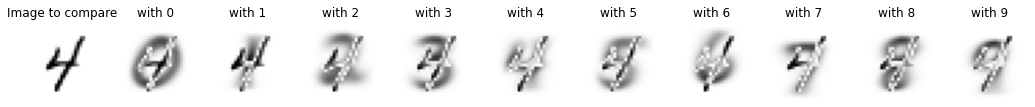


MSE - Mean Squared Error:


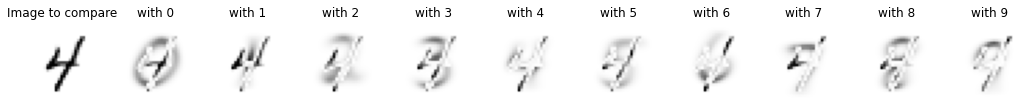

In [ ]:
digit = 4
img = stacked_tensors_dict[digit][10]

fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(18,5))
for i in range(10):
    show_image(means_dict[i], title=f"Mean {i}", ax=axs[i+1])
show_image(img, title='Image to compare', ax=axs[0])
plt.show()

print('\nSimple Difference:')
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(18,5))
for i in range(10):
    show_image((img - means_dict[i]), title=f'with {i}', ax=axs[i+1])
show_image(img, title='Image to compare', ax=axs[0])
plt.show()

print('\nMAE - Mean Absolute Error:')
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(18,5))
for i in range(10):
    show_image((img - means_dict[i]).abs(), title=f'with {i}', ax=axs[i+1])
show_image(img, title='Image to compare', ax=axs[0])
plt.show()

print('\nMSE - Mean Squared Error:')
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(18,5))
for i in range(10):
    show_image((img - means_dict[i]).square(), title=f'with {i}', ax=axs[i+1])
show_image(img, title='Image to compare', ax=axs[0])
plt.show()

PyTorch already provides both of these as *loss functions*. You'll find these inside `torch.nn.functional`, which the PyTorch team recommends importing as `F` (and is available by default under that name in fastai):

In [ ]:
F.l1_loss(img.float(),means_dict[7]), F.mse_loss(img, means_dict[7]).sqrt()  

(tensor(0.1161), tensor(0.2299))

Here `mse` stands for *mean squared error*, and `l1` refers to the standard mathematical jargon for *mean absolute value* (in math it's called the *L1 norm*).

So, is our baseline model any good? To quantify this, we must define a metric.

c over a *validation set*. This is so that we don't inadvertently overfit—that is, train a model to work well only on our training data. This is not really a risk with the pixel similarity model we're using here as a first try, since it has no trained components, but we'll use a validation set anyway to follow normal practices and to be ready for our second try later.

To get a validation set we need to remove some of the data from training entirely, so it is not seen by the model at all. As it turns out, the creators of the MNIST dataset have already done this for us. Do you remember how there was a whole separate directory called *valid*? That's what this directory is for!

So to start with, let's create tensors for our 3s and 7s from that directory. These are the tensors we will use to calculate a metric measuring the quality of our first-try model, which measures distance from an ideal image:

### Create validation set

In [ ]:
valid_tensors_dict = {}

for digit, tnrs in stacked_tensors_dict.items():
    valid_tensors_dict[digit] = torch.stack([tensor(Image.open(o)) 
                                             for o in (path/'testing'/f"{digit}").ls()])
    valid_tensors_dict[digit] = valid_tensors_dict[digit].float()/255
    print('shape for',digit, ':', valid_tensors_dict[digit].shape)

shape for 0 : torch.Size([980, 28, 28])
shape for 1 : torch.Size([1135, 28, 28])
shape for 2 : torch.Size([1032, 28, 28])
shape for 3 : torch.Size([1010, 28, 28])
shape for 4 : torch.Size([982, 28, 28])
shape for 5 : torch.Size([892, 28, 28])
shape for 6 : torch.Size([958, 28, 28])
shape for 7 : torch.Size([1028, 28, 28])
shape for 8 : torch.Size([974, 28, 28])
shape for 9 : torch.Size([1009, 28, 28])


It's good to get in the habit of checking shapes as you go. Here we see 10 tensors, each representing one digit validation set of about 1,000 images of size 28×28. Total number of validation images is 10,000.

In [ ]:
print('Shapes of image tensor for each digit:')
for digit, tnrs in valid_tensors_dict.items():
    print(' shape for',digit, ':', valid_tensors_dict[digit].shape)

Shapes of image tensor for each digit:
 shape for 0 : torch.Size([980, 28, 28])
 shape for 1 : torch.Size([1135, 28, 28])
 shape for 2 : torch.Size([1032, 28, 28])
 shape for 3 : torch.Size([1010, 28, 28])
 shape for 4 : torch.Size([982, 28, 28])
 shape for 5 : torch.Size([892, 28, 28])
 shape for 6 : torch.Size([958, 28, 28])
 shape for 7 : torch.Size([1028, 28, 28])
 shape for 8 : torch.Size([974, 28, 28])
 shape for 9 : torch.Size([1009, 28, 28])


### Loss - Metric

We ultimately want to write a function, `evaluate_digit()`, that will return the most probable digit for one inage we pass to the function.

**STOP AND THINK**:

- How would you extrapolate the approach for used in the sample MNIST case, when we only had two digits? 
- In this casem you cannot use the same method because we have more than two digits this time. 
- A function `is_3` as `True` or `False` is not enough. 



Hint for one possible solution: 
- compare the distances between one image and each of the mean images, then assume that the image corresponds to the digit with the smallest distance.

Code for this approach:

1. We keep the same distance as before, that is MAE:

In [ ]:
def mnist_distance(a, b): 
    return (a - b).abs().mean((-1, -2))

mnist_distance(img, means_dict[7])

tensor(0.1161)

2. We compute the distance to each digit mean

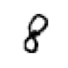

Distance between image and 0 is 0.17526860535144806 
Distance between image and 1 is 0.10276549309492111 
Distance between image and 2 is 0.14086976647377014 
Distance between image and 3 is 0.13517886400222778 
Distance between image and 4 is 0.13471366465091705 
Distance between image and 5 is 0.13225553929805756 
Distance between image and 6 is 0.1401117891073227 
Distance between image and 7 is 0.1433369368314743 
Distance between image and 8 is 0.11083243042230606 
Distance between image and 9 is 0.13293065130710602 


In [ ]:
# Select an image to compate
img_tnsr = valid_tensors_dict[8][559]
show_image(img_tnsr)
plt.show()

for i in range(10):
    print(f"Distance between image and {i} is {mnist_distance(img_tnsr, means_dict[i])} ")

The smallest distance should represent the correct digit. In this case it is correct.

With broadcasting, we also can apply the distance to all the images of one class/digit at the same time. `mnist_distance` should return a tensor with the distances for all the images in the batch.

In [ ]:
# Select a batch with all the images representing one digit
img_tnsr = stacked_tensors_dict[8]

distances = mnist_distance(img_tnsr, means_dict[7])
display(distances.shape)
display(distances)

torch.Size([5851])

tensor([0.1501, 0.1984, 0.1541,  ..., 0.1339, 0.1280, 0.1585])

In [ ]:
# Show distances to all the digits
img_tnsr = stacked_tensors_dict[8]

for i in range(10):
    display(mnist_distance(img_tnsr, means_dict[i]))

tensor([0.1795, 0.2126, 0.1797,  ..., 0.1697, 0.1837, 0.1942])

tensor([0.1039, 0.2042, 0.0930,  ..., 0.1016, 0.0990, 0.1375])

tensor([0.1480, 0.2038, 0.1472,  ..., 0.1283, 0.1469, 0.1563])

tensor([0.1456, 0.1777, 0.1394,  ..., 0.1344, 0.1268, 0.1538])

tensor([0.1559, 0.2038, 0.1607,  ..., 0.1249, 0.1370, 0.1435])

tensor([0.1481, 0.1930, 0.1450,  ..., 0.1308, 0.1336, 0.1525])

tensor([0.1612, 0.1939, 0.1614,  ..., 0.1305, 0.1458, 0.1656])

tensor([0.1501, 0.1984, 0.1541,  ..., 0.1339, 0.1280, 0.1585])

tensor([0.1197, 0.1959, 0.1252,  ..., 0.1110, 0.1156, 0.1399])

tensor([0.1483, 0.1949, 0.1511,  ..., 0.1262, 0.1202, 0.1497])

Let's see how are can compute all the distances from one image tensor batch to each of the digit means in a few operations only. 

1. Let's see what we have to start with:
    - we start from a batch of image tensors `image_tensor_batch` of shape `(nbr_img, 28, 28)`
    - `mnist_distance(image_tensor_batch)` returns a tensor of shape `(nbr_img)`

In [ ]:
img_batch_tnsr = stacked_tensors_dict[8]
print('Shape of batch_tnsr:', img_batch_tnsr.shape)

distances = mnist_distance(img_tnsr, means_dict[0])
print('Shape of distances: ', distances.shape)

Shape of batch_tnsr: torch.Size([5851, 28, 28])
Shape of distances:  torch.Size([5851])


2. Now we want to have all distances for all digits in a dimension-2 tensor of shape `(nbr of images, 10)`. That is a tensor with the same number of samples/images as the batch and a distance to each digit. Using tensors instead of list or other data sructure will allow us to use fast tensor calculation to easily extract which digit corresponds to each image, as opposed to slow Python loop through all the images in Python. One way to do it:
    - use the `torch.stack` function to stack the distances tensors for each of the digits into one single tensor

In [ ]:
distances = torch.stack([mnist_distance(img_tnsr, m) for m in means_dict.values()], dim=1)
display(distances)
distances.shape

tensor([[0.1795, 0.1039, 0.1480,  ..., 0.1501, 0.1197, 0.1483],
        [0.2126, 0.2042, 0.2038,  ..., 0.1984, 0.1959, 0.1949],
        [0.1797, 0.0930, 0.1472,  ..., 0.1541, 0.1252, 0.1511],
        ...,
        [0.1697, 0.1016, 0.1283,  ..., 0.1339, 0.1110, 0.1262],
        [0.1837, 0.0990, 0.1469,  ..., 0.1280, 0.1156, 0.1202],
        [0.1942, 0.1375, 0.1563,  ..., 0.1585, 0.1399, 0.1497]])

torch.Size([5851, 10])

"decrypting" code above: `torch.stack([mnist_distance(img_tnsr, m) for m in means_dict.values()], dim=1)`
- Signature of stack: `torch.stack(tensors, dim=0)` [doc](https://pytorch.org/docs/stable/generated/torch.stack.html):
    - `tensors` is a sequence of tensors to concatenate, for instance a list of tensors
    - `dim` is the dimension to insert. Has to be between 0 and the number of dimensions of concatenated, In our case, `dim` is 1 as we want to stack the 10 values for each images. You can try other values and see what it gives.
- `[mnist_distance(img_tnsr, m) for m in means_dict.values()]`:
    - list comprehension to get a list of the 10 distances, one for each digit. Remember that means_dict keeps the ten mean images reporesenting the "ideal" difit. The list comprehension is equivalent to:
    ```python
        tensor_list = []
        for mean in means_dict.values():
            tensor_list.append(mnist_distance(img_tnsr, m))
    ```

The code is passing a list of 10 dimension-1 tensors (shape = `(number of images in the batch)`) to `torch.stack`, to create a dimension-2 tensor of shape `(number of images in the batch, 10)`

Now we have a tensor `distances` with the distance of each image to the ten means. We can index it to get the distances of any image to the ten means.

In [ ]:
distances[120:125, :]

tensor([[0.1680, 0.1831, 0.1666, 0.1545, 0.1572, 0.1537, 0.1583, 0.1848, 0.1462, 0.1656],
        [0.1888, 0.1888, 0.1770, 0.1895, 0.1614, 0.1828, 0.1675, 0.1957, 0.1638, 0.1754],
        [0.1686, 0.1799, 0.1772, 0.1616, 0.1734, 0.1523, 0.1580, 0.1956, 0.1547, 0.1768],
        [0.1796, 0.1059, 0.1646, 0.1448, 0.1495, 0.1309, 0.1498, 0.1442, 0.1367, 0.1318],
        [0.1684, 0.1696, 0.1688, 0.1595, 0.1498, 0.1495, 0.1552, 0.1718, 0.1316, 0.1451]])

3. Select the class/digit for each image in the batch: pick the minimum distance. We will use the method tensor `argmin()` to pick the index with minimum distance, which is the digit corresponding to the minumum distance and therefore our class as we defined it in our approach.

> See how `argmin` works with a single image. We pick one image tensor and show it. We also pick the corresponding distances to the ten digit, i.e. a tensor of shape (10). `argmin()` returns the index of the minimum distance, in this case 8, which corresponds to digit 8.

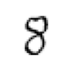

tensor([0.1650, 0.1222, 0.1467, 0.1261, 0.1344, 0.1259, 0.1477, 0.1398, 0.1143, 0.1293])

tensor(0.1143)

In [ ]:
img_nbr = 25
show_image(stacked_tensors_dict[8][img_nbr])
plt.show()

distances_for_one_img = distances[img_nbr]
display(distances_for_one_img)
distances_for_one_img.argmin()
distances_for_one_img[8]

When we apply to a batch of images, we need to tell pytorch along which direction the minimum must be seeked. In our case `dim=1`.  It returns a tensor of dimension 1, with shape = `(nbr_img)`

In [ ]:
digits = distances.argmin(dim=1)
digits.shape

torch.Size([5851])

```
argmin(input, dim, keepdim=False) -> LongTensor

Returns the indices of the minimum values of a tensor across a dimension.

This is the second value returned by :meth:`torch.min`. See its
documentation for the exact semantics of this method.

Args:
    input (Tensor): the input tensor.
    dim (int): the dimension to reduce. If ``None``, the argmin of the flattened input is returned.
    keepdim (bool): whether the output tensor has :attr:`dim` retained or not. Ignored if ``dim=None``.
```

Using `argmin()` allows us to compute the mimimun for all images, in one step, and with no Python loop.

### Pixel Similarity Classifier

Now we can build our classifier as a function `evaluate_digit` to which we pass an image tensor or a batch of image tensors and which will return a class/digit

In [ ]:
def evaluate_digit(x): 
    if x.ndim < 3:
        x = x.unsqueeze(dim=0)
    distances = torch.stack([mnist_distance(x, m) for m in means_dict.values()], dim=1)
    return distances.argmin(dim=1)

>Note: we unsqueeze the tensor when a single image is given instead of a batch, because we expect a batch. Unsqueezing is like translforming a single image into a batch with a single image:
```python
    if x.ndim < 3:
        x = x.unsqueeze(dim=0)
```

See the difference below

In [ ]:
img.shape, img.unsqueeze(dim=0).shape

(torch.Size([28, 28]), torch.Size([1, 28, 28]))

Let's test our classifier with a single image:

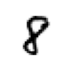

tensor([8])

In [ ]:
tnsr = stacked_tensors_dict[8][58]
show_image(tnsr)
plt.show()

evaluate_digit(tnsr)

Let's test our classifier with a small image batch:

In [ ]:
tnsr = stacked_tensors_dict[8][58:87]
print('Nbr images: ', tnsr.shape[0])

evaluate_digit(tnsr)

Nbr images:  29


tensor([8, 8, 1, 1, 9, 1, 8, 9, 1, 8, 1, 1, 8, 8, 1, 9, 9, 9, 1, 8, 3, 8, 1, 1, 8, 1, 8, 1, 8])

We can see that the model is not that great ! Some images are correctly evaluated and some are not.

### Evaluation of the classifier
Let's compute the accuracy for the train and the validation set for each class/digit
1. For each class, we evaluate the digit for the full dataset (training and validation)
2. We compute how many are correct and how many are not correct

In [ ]:
# One class at the time
digit = 5
tnsr = stacked_tensors_dict[digit]
preds = evaluate_digit(tnsr) 
correct = torch.eq(preds, digit).sum()
incorrect = torch.ne(preds, digit).sum()
correct.item(), incorrect.item(), (correct / preds.shape[0]).item()

(1627, 3794, 0.30012911558151245)

In [ ]:
# All digits for training set
for digit in range(10):
    tnsr = stacked_tensors_dict[digit]
    preds = evaluate_digit(tnsr) 
    correct = torch.eq(preds, digit).sum()
    # print(f" - {correct.item():,d} correct digits out or {preds.shape[0]}")
    print(f"Accuracy for {digit}: {(correct / preds.shape[0]).item():1.4f}")

Accuracy for 0: 0.8141
Accuracy for 1: 0.9981
Accuracy for 2: 0.4329
Accuracy for 3: 0.5836
Accuracy for 4: 0.6648
Accuracy for 5: 0.3001
Accuracy for 6: 0.7454
Accuracy for 7: 0.7778
Accuracy for 8: 0.3958
Accuracy for 9: 0.7163


In [ ]:
# All digits for validation set
for digit in range(10):
    tnsr = valid_tensors_dict[digit]
    preds = evaluate_digit(tnsr) 
    correct = torch.eq(preds, digit).sum()
    # print(f" - {correct.item():,d} correct digits out or {preds.shape[0]}")
    print(f"Accuracy for {digit}: {(correct / preds.shape[0]).item():1.4f}")

Accuracy for 0: 0.8153
Accuracy for 1: 0.9982
Accuracy for 2: 0.4234
Accuracy for 3: 0.6089
Accuracy for 4: 0.6680
Accuracy for 5: 0.3262
Accuracy for 6: 0.7871
Accuracy for 7: 0.7646
Accuracy for 8: 0.4425
Accuracy for 9: 0.7760


Although this is not awfull, the performance varies a lot for each of the digit. 0 and 1 are well classified byt 5 and 8 are not, for example.

Can we do better if we use another metric? We uses MAE, let's do the same but using RMSE:

In [ ]:
# Define a new loss/distance function: mnist_rmse
def mnist_rmse(a, b):
    return ((a - b) ** 2 ).mean((-1, -2)).sqrt()

# Our new classifier will use rmse to compute the distances and pick the minimum
def evaluate_digit_rmse(x): 
    if x.ndim < 3:
        x = x.unsqueeze(dim=0)
    distances = torch.stack([mnist_rmse(x, m) for m in means_dict.values()], dim=1)
    return distances.argmin(dim=1)

Now we can evaluate the performance of this new classifer with the validation set

In [ ]:
# All digits for validation set
for digit in range(10):
    tnsr = valid_tensors_dict[digit]
    preds = evaluate_digit_rmse(tnsr) 
    correct = torch.eq(preds, digit).sum()
    # print(f" - {correct.item():,d} correct digits out or {preds.shape[0]}")
    print(f"Accuracy for {digit}: {(correct / preds.shape[0]).item():1.4f}")

Accuracy for 0: 0.8959
Accuracy for 1: 0.9621
Accuracy for 2: 0.7568
Accuracy for 3: 0.8059
Accuracy for 4: 0.8259
Accuracy for 5: 0.6861
Accuracy for 6: 0.8633
Accuracy for 7: 0.8327
Accuracy for 8: 0.7372
Accuracy for 9: 0.8067


We see that the accuracy increases for almost all the digits. 

The base line is not bad, but all in all, it still shows some relativaly low accuracy compared to real model.

## Stochastic Gradient Descent (SGD)

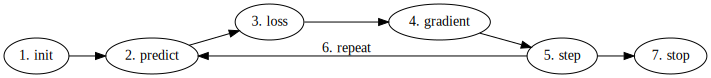

In [ ]:
gv('''
"1. init"->"2. predict"->"3. loss"->"4. gradient"->"5. step"->"7. stop"
"5. step"->"2. predict"[label="6. repeat"]
''')

Steps that we are going to require, to turn a function into a machine learning classifier:

1. *Initialize* the weights.
1. For each image, use these weights to *predict* whether it appears to be a 3 or a 7.
1. Based on these predictions, calculate how good the model is (its *loss*).
1. Calculate the *gradient*, which measures for each weight, how changing that weight would change the loss
1. *Step* (that is, change) all the weights based on that calculation.
1. Go back to the step 2, and *repeat* the process.
1. Iterate until you decide to *stop* the training process (for instance, because the model is good enough or you don't want to wait any longer).

#### Prepare datasets and dataloaders

`train_x` is the set of independant variables (inputs), that is our images. We create  `train_x` tensor by concatenating all the tensors for each digit.

In [ ]:
train_x = torch.cat([stacked_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

In [ ]:
train_x.shape

torch.Size([60000, 784])

As expected, it is a set of 60,000 images represented as a flat one dimension vector of shape 28 x 28 = 784

We need a label for each image, 0 to 9, depending on the digit the image represent. It is not as simple as for the basic MNIST case, as we have more than two classes and the number of images in each class is not equal. There is probably an easier way than the one below !

In [ ]:
# Returns a list of 10 sublists, where each sublist consists of a as many times digit as the number of image in the category
l = [ [i] * stacked_tensors_dict[i].shape[0] for i in range(0,10)]

# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == train_x.shape[0] 

In [ ]:
# Create a tensor based on the list of labels
label_list = []
for i in range(10):
    label_list.extend(l[i])
assert len(label_list) == train_x.shape[0]

train_y = torch.tensor(label_list).unsqueeze(1)
train_x.shape,train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

The shapes of `train_x` and `train_y` are as expected

A `Dataset` in PyTorch is required to return a tuple of `(x,y)` when indexed. Python provides a `zip` function which, when combined with `list`, provides a simple way to get this functionality:

In [ ]:
from random import shuffle

dset = list(zip(train_x,train_y))
shuffle(dset)


x, y = dset[0]
x.shape,y

(torch.Size([784]), tensor([5]))

Now we do the same for the validation sets

In [ ]:
valid_x = torch.cat([valid_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

# Returns a list of 10 sublists, where each sublist consists of a as many times digit as the number of image in the category
l = [ [i] * valid_tensors_dict[i].shape[0] for i in range(0,10)]

# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == valid_x.shape[0] 
print(valid_x.shape)

# Create a tensor based on the list of labels
label_list = []
for i in range(10):
    label_list.extend(l[i])
assert len(label_list) == valid_x.shape[0]

valid_y = torch.tensor(label_list).unsqueeze(1)
print(valid_y.shape)

valid_dset = list(zip(valid_x,valid_y))

torch.Size([10000, 784])
torch.Size([10000, 1])


Datasets are ready. Now we prepare the dataloaders to feed the training loop.

In [ ]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

#### Define the model architecture and parameters

Model is defined by creating functions to compute each of the 7 steps listed above

##### Parameters

In our model, we need to evaluate the distance from one image (input) to each of the possible classes (0 - 9). So we need to predict 10 values, out of which we will pick the minimum value to predict the correpsonding digit.

In effect,**y** in **y=Wx+b** represents the `distances` between the image **x** and each of the digits. **y** is therefore a vector of shape `(10)`. The prediction is computed from an image **x** which is a vector of shape `(784)`. Therefore **W** must be of shape `(784, 10)`. And **b** must be of the same shape as the output, that is shape `(10)`.

<img src="https://raw.githubusercontent.com/vtecftwy/fastbook/master/images/img_mnist_full_linear_layer.png" height="400px" />


Define a function to create random parameters, and then create **W** and **b** with the correct shapes

In [ ]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 10))
bias = init_params(10)

weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

##### Define functions to calculate the predictions

In [ ]:
def linear(xb):
    outputs =  xb @ weights + bias
    probs = torch.softmax(outputs, dim=1)
    return probs

def evaluate_preds(xb):
    probs = linear(xb)
    return probs.argmax(dim=1).unsqueeze(dim=1)

##### Define a function to calculate the loss

In [ ]:
# Loss Function: Cross Entropy Loss a.k.a. Negative Log Likelihood Loss
# https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss
loss_fct = nn.NLLLoss()

##### Define a function to calculate the gradients

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

In [ ]:
# xb, yb = first(dl)
# display(xb.shape, yb.shape)
# probs = linear(xb)
# display(probs.shape)
# evaluate_preds(xb)
# display(yb)
# loss_fct(probs, yb.squeeze())
# calc_grad(xb, yb, linear)

##### Define a function performing one step/one epoch

In [ ]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

##### Define a function to evaluate the validation accurary

In [ ]:
#Determines how many of the predictions are actually correct 
def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

In [ ]:
# preds.unsqueeze(dim=1)

In [ ]:
#Collects the accuracy from each element in the dataloader and displays it
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

#### Bringing it all together and run training loop

In [ ]:
weights = init_params((28*28, 10))
bias = init_params(10)

lr = 1
params = weights, bias

train_epoch(linear, lr, params)

train_epoch(linear, lr, params)
validate_epoch(evaluate_preds)

0.5515

In [ ]:
n_epochs = 20
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')

0:0.5845 1:0.6681 2:0.7060 3:0.7260 4:0.7386 5:0.7498 6:0.7595 7:0.7671 8:0.7729 9:0.7781 10:0.7820 11:0.7860 12:0.7895 13:0.7925 14:0.7944 15:0.7976 16:0.7999 17:0.8027 18:0.8044 19:0.8062 

In [ ]:
n_epochs = 20
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')

0:0.8083 1:0.8098 2:0.8117 3:0.8128 4:0.8135 5:0.8145 6:0.8154 7:0.8161 8:0.8167 9:0.8174 10:0.8185 11:0.8196 12:0.8200 13:0.8203 14:0.8210 15:0.8218 16:0.8221 17:0.8222 18:0.8225 19:0.8226 

In [ ]:
n_epochs = 20
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')

0:0.8233 1:0.8239 2:0.8242 3:0.8249 4:0.8253 5:0.8259 6:0.8259 7:0.8261 8:0.8263 9:0.8262 10:0.8266 11:0.8271 12:0.8273 13:0.8275 14:0.8277 15:0.8282 16:0.8282 17:0.8289 18:0.8293 19:0.8298 

In [ ]:
n_epochs = 200
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    if i%10 == 0:
        print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')
print(validate_epoch(evaluate_preds))

0:0.8302 10:0.8314 20:0.8321 30:0.8335 40:0.8346 50:0.8361 60:0.8368 70:0.8375 80:0.8379 90:0.8380 100:0.8379 110:0.8388 120:0.8392 130:0.8394 140:0.8394 150:0.8397 160:0.8399 170:0.8398 180:0.8399 190:0.8399 0.8399


In [ ]:
n_epochs = 200
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    if i%10 == 0:
        print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')
print(validate_epoch(evaluate_preds))

0:0.8398 10:0.8399 20:0.8406 30:0.8406 40:0.8407 50:0.8409 60:0.8415 70:0.8410 80:0.8407 90:0.8407 100:0.8406 110:0.8407 120:0.8407 130:0.8409 140:0.8409 150:0.8409 160:0.8409 170:0.8413 180:0.8417 190:0.8416 0.8416


In [ ]:
n_epochs = 2000
for i in range(n_epochs):
    train_epoch(linear, lr, params)
    if i%100 == 0:
        print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')
print(validate_epoch(evaluate_preds))

0:0.8416 100:0.8416 200:0.8423 300:0.8427 400:0.8424 500:0.8425 600:0.8421 700:0.8425 800:0.8429 900:0.8431 1000:0.8429 1100:0.8428 1200:0.8425 1300:0.8428 1400:0.8428 1500:0.8429 1600:0.8425 1700:0.8426 1800:0.8429 1900:0.8431 0.8431


In [ ]:
print(validate_epoch(evaluate_preds))

0.8431


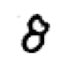

tensor([[8]])

In [ ]:
img = valid_tensors_dict[8][49]
show_image(img)
plt.show()
evaluate_preds(img.view(28*28).unsqueeze(dim=0))

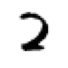

tensor([[2]])

In [ ]:
img = valid_tensors_dict[2][159]
show_image(img)
plt.show()
evaluate_preds(img.view(28*28).unsqueeze(dim=0))

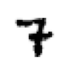

tensor([[7]])

In [ ]:
img = valid_tensors_dict[7][957]
show_image(img)
plt.show()
evaluate_preds(img.view(28*28).unsqueeze(dim=0))

## Improve model by introducing ReLu and two layers

In [ ]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28, 100))
b1 = init_params(100)

w2 = init_params((100, 10))
b2 = init_params(10)

w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([784, 100]),
 torch.Size([100]),
 torch.Size([100, 10]),
 torch.Size([10]))

##### Define functions to calculate the predictions

In [ ]:
activ1 = nn.ReLU()

def linear1(xb):
    outputs =  xb @ w1 + b1
    return activ1(outputs)

def linear2(xb):
    outputs =  xb @ w2 + b2
    probs = torch.softmax(outputs, dim=1)
    return probs

def model(xb):
    xb = linear1(xb)
    xb = linear2(xb)
    return xb

def classifier(xb):
    xb = model(xb)
    return xb.argmax(dim=1).unsqueeze(dim=1)

In [ ]:
# # Testing layer by layer
# xb, yb = first(dl)
# display(xb.shape, yb.shape)
# display(linear1(xb).shape)
# display(linear2(linear1(xb)).shape)
# display(model(xb))
# classifier(xb)[0:3]

##### Define a function to calculate the loss

In [ ]:
# Loss Function: Cross Entropy Loss a.k.a. Negative Log Likelihood Loss
# https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss
loss_fct = nn.NLLLoss()

##### Define a function to calculate the gradients

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

In [ ]:
# # Testing function
# xb, yb = first(dl)
# display(xb.shape, yb.shape)
# probs = model(xb)
# display(probs.shape)
# # display(yb)
# loss_fct(probs, yb.squeeze())
# calc_grad(xb, yb, model)

##### Define a function performing one step/one epoch

In [ ]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

##### Define a function to evaluate the validation accurary

In [ ]:
#Determines how many of the predictions are actually correct 
def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

In [ ]:
# preds.unsqueeze(dim=1)

In [ ]:
#Collects the accuracy from each element in the dataloader and displays it
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

#### Bringing it all together and run training loop

Create a function to run `n` epochs and display results.

In [ ]:
from math import log10

def run_n_epochs(model, lr, params, n_epochs):
    trigger = 10**(int(log10(n_epochs))-1)
    cols = 10
    starting_i = metric_results['epochs'][-1] + 1
    for i in range(starting_i, starting_i + n_epochs):
        train_epoch(model, lr, params)
        if i%trigger == 0:
            v = validate_epoch(classifier)

            metric_results['epochs'].append(i)
            metric_results['values'].append(v)
            
            end_str = '\n' if i//trigger%cols == 0 else ' ' 
            print(f"{i:3d}:{v:1.4f}", end=end_str)
    print(f"\nLast:{v:1.4f}")
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    ax.scatter(metric_results['epochs'], metric_results['values'])
    return metric_results

Shuffle data, initalize parameters, run one epoch

In [ ]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 100))
b1 = init_params(100)
w2 = init_params((100, 10))
b2 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.4211

  1:0.5528   2:0.6007   3:0.6143   4:0.6568   5:0.6803   6:0.6884   7:0.7005   8:0.6987   9:0.7051  10:0.7106
 11:0.7125  12:0.7132  13:0.7160  14:0.7155  15:0.7175  16:0.7187  17:0.7218  18:0.7211  19:0.7229  20:0.7215

Last:0.7215


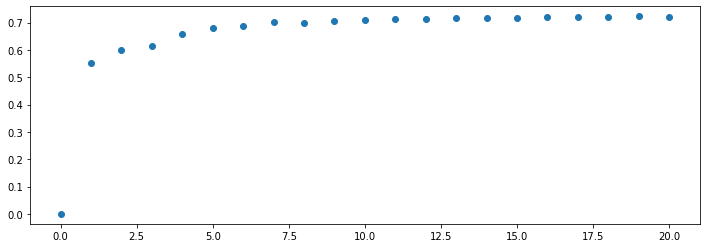

In [ ]:
metric_results = run_n_epochs(model, lr, params, 20)

 21:0.7242  22:0.7256  23:0.7254  24:0.7270  25:0.7267  26:0.7285  27:0.7281  28:0.7290  29:0.7286  30:0.7302
 31:0.7305  32:0.7326  33:0.7317  34:0.7314  35:0.7319  36:0.7310  37:0.7324  38:0.7335  39:0.7321  40:0.7341

Last:0.7341


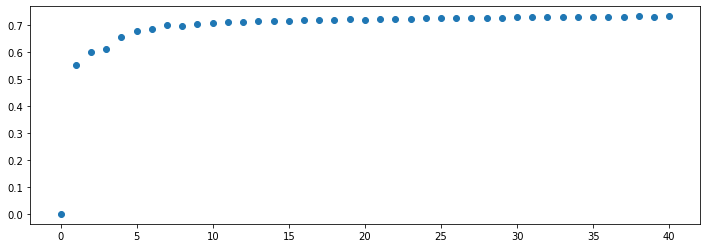

In [ ]:
metric_results = run_n_epochs(model, lr, params, 20)

 41:0.7346  42:0.7345  43:0.7353  44:0.7352  45:0.7355  46:0.7353  47:0.7349  48:0.7347  49:0.7356  50:0.7357
 51:0.7355  52:0.7367  53:0.7362  54:0.7368  55:0.7366  56:0.7355  57:0.7374  58:0.7370  59:0.7370  60:0.7377

Last:0.7377


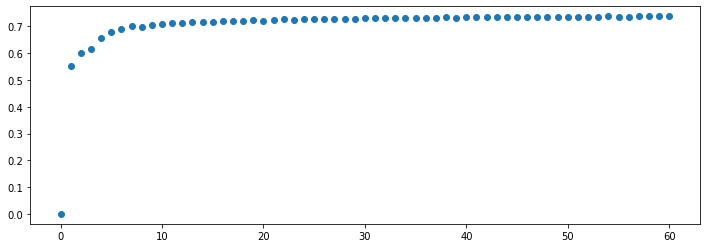

In [ ]:
metric_results = run_n_epochs(model, lr, params, 20)

In [ ]:
metric_results = run_n_epochs(model, lr, params, 20)

In [ ]:
metric_results = run_n_epochs(model, lr, params, 50)

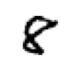

tensor([[5]])

In [ ]:
img = valid_tensors_dict[8][49]
show_image(img)
plt.show()
classifier(img.view(28*28).unsqueeze(dim=0))

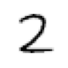

tensor([[2]])

In [ ]:
img = valid_tensors_dict[2][159]
show_image(img)
plt.show()

classifier(img.view(28*28).unsqueeze(dim=0))

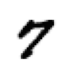

tensor([[7]])

In [ ]:
img = valid_tensors_dict[7][957]
show_image(img)
plt.show()

classifier(img.view(28*28).unsqueeze(dim=0))

# UPDATED TILL HERE

### Creating an Optimizer

Because this is such a general foundation, PyTorch provides some useful classes to make it easier to implement. The first thing we can do is replace our `linear1` function with PyTorch's `nn.Linear` module. A *module* is an object of a class that inherits from the PyTorch `nn.Module` class. Objects of this class behave identically to standard Python functions, in that you can call them using parentheses and they will return the activations of a model.

`nn.Linear` does the same thing as our `init_params` and `linear` together. It contains both the *weights* and *biases* in a single class. Here's how we replicate our model from the previous section:

In [ ]:
linear_model = nn.Linear(28*28,10)

Every PyTorch module knows what parameters it has that can be trained; they are available through the `parameters` method:

In [ ]:
w, b = linear_model.parameters()
w.shape,b.shape

(torch.Size([10, 784]), torch.Size([10]))

We can use this information to create an optimizer:

In [ ]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

We can create our optimizer by passing in the model's parameters:

In [ ]:
opt = BasicOptim(linear_model.parameters(), lr)

Our training loop can now be simplified to:

In [ ]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

Our validation function doesn't need to change at all:

In [ ]:
validate_epoch(linear_model)

0.0

Let's put our little training loop in a function, to make things simpler:

In [ ]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

The results are the same as in the previous section:

In [ ]:
train_model(linear_model, 20)

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

fastai provides the `SGD` class which, by default, does the same thing as our `BasicOptim`:

In [ ]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

fastai also provides `Learner.fit`, which we can use instead of `train_model`. To create a `Learner` we first need to create a `DataLoaders`, by passing in our training and validation `DataLoader`s:

In [ ]:
dls = DataLoaders(dl, valid_dl)

To create a `Learner` without using an application (such as `cnn_learner`) we need to pass in all the elements that we've created in this chapter: the `DataLoaders`, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [ ]:
learn = Learner(dls, nn.Linear(28*28,10), opt_func=SGD,
                loss_func=loss_fct, metrics=batch_accuracy)

Now we can call `fit`:

In [ ]:
learn.fit(10, lr=lr)

As you can see, there's nothing magic about the PyTorch and fastai classes. They are just convenient pre-packaged pieces that make your life a bit easier! (They also provide a lot of extra functionality we'll be using in future chapters.)

With these classes, we can now replace our linear model with a neural network.

## Adding a Nonlinearity

So far we have a general procedure for optimizing the parameters of a function, and we have tried it out on a very boring function: a simple linear classifier. A linear classifier is very constrained in terms of what it can do. To make it a bit more complex (and able to handle more tasks), we need to add something nonlinear between two linear classifiers—this is what gives us a neural network.

Here is the entire definition of a basic neural network:

In [ ]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

That's it! All we have in `simple_net` is two linear classifiers with a `max` function between them.

Here, `w1` and `w2` are weight tensors, and `b1` and `b2` are bias tensors; that is, parameters that are initially randomly initialized, just like we did in the previous section:

In [ ]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point about this is that `w1` has 30 output activations (which means that `w2` must have 30 input activations, so they match). That means that the first layer can construct 30 different features, each representing some different mix of pixels. You can change that `30` to anything you like, to make the model more or less complex.

That little function `res.max(tensor(0.0))` is called a *rectified linear unit*, also known as *ReLU*. We think we can all agree that *rectified linear unit* sounds pretty fancy and complicated... But actually, there's nothing more to it than `res.max(tensor(0.0))`—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as `F.relu`:

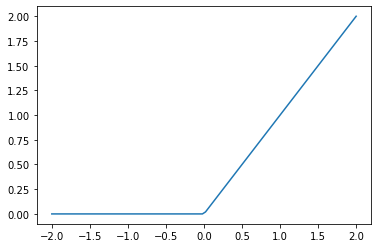

In [ ]:
plot_function(F.relu)

> J: There is an enormous amount of jargon in deep learning, including terms like _rectified linear unit_. The vast vast majority of this jargon is no more complicated than can be implemented in a short line of code, as we saw in this example. The reality is that for academics to get their papers published they need to make them sound as impressive and sophisticated as possible. One of the ways that they do that is to introduce jargon. Unfortunately, this has the result that the field ends up becoming far more intimidating and difficult to get into than it should be. You do have to learn the jargon, because otherwise papers and tutorials are not going to mean much to you. But that doesn't mean you have to find the jargon intimidating. Just remember, when you come across a word or phrase that you haven't seen before, it will almost certainly turn out to be referring to a very simple concept.

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there's no point just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as `max`, then this is no longer true. Now each linear layer is actually somewhat decoupled from the other ones, and can do its own useful work. The `max` function is particularly interesting, because it operates as a simple `if` statement.

> S: Mathematically, we say the composition of two linear functions is another linear function. So, we can stack as many linear classifiers as we want on top of each other, and without nonlinear functions between them, it will just be the same as one linear classifier.

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for `w1` and `w2` and if you make these matrices big enough. For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the *universal approximation theorem*. The three lines of code that we have here are known as *layers*. The first and third are known as *linear layers*, and the second line of code is known variously as a *nonlinearity*, or *activation function*.

Just like in the previous section, we can replace this code with something a bit simpler, by taking advantage of PyTorch:

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

`nn.Sequential` creates a module that will call each of the listed layers or functions in turn.

`nn.ReLU` is a PyTorch module that does exactly the same thing as the `F.relu` function. Most functions that can appear in a model also have identical forms that are modules. Generally, it's just a case of replacing `F` with `nn` and changing the capitalization. When using `nn.Sequential`, PyTorch requires us to use the module version. Since modules are classes, we have to instantiate them, which is why you see `nn.ReLU()` in this example. 

Because `nn.Sequential` is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains. Let's try it out! As this is a deeper model, we'll use a lower learning rate and a few more epochs.

In [ ]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [ ]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.333021,0.396112,0.512267,00:00
1,0.152461,0.235238,0.797350,00:00
2,0.083573,0.117471,0.911678,00:00
3,0.054309,0.078720,0.940628,00:00
4,0.040829,0.061228,0.956330,00:00
5,0.034006,0.051490,0.963690,00:00
6,0.030123,0.045381,0.966634,00:00
7,0.027619,0.041218,0.968106,00:00
8,0.025825,0.038200,0.969087,00:00
9,0.024441,0.035901,0.969578,00:00


We're not showing the 40 lines of output here to save room; the training process is recorded in `learn.recorder`, with the table of output stored in the `values` attribute, so we can plot the accuracy over training as:

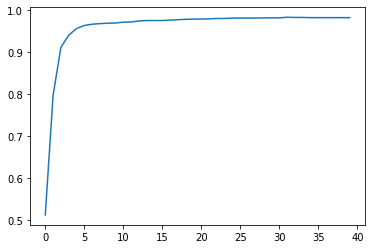

In [ ]:
plt.plot(L(learn.recorder.values).itemgot(2));

And we can view the final accuracy:

In [ ]:
learn.recorder.values[-1][2]

0.98233562707901

At this point we have something that is rather magical:

1. A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters
1. A way to find the best set of parameters for any function (stochastic gradient descent)

This is why deep learning can do things which seem rather magical, such fantastic things. Believing that this combination of simple techniques can really solve any problem is one of the biggest steps that we find many students have to take. It seems too good to be true—surely things should be more difficult and complicated than this? Our recommendation: try it out! We just tried it on the MNIST dataset and you have seen the results. And since we are doing everything from scratch ourselves (except for calculating the gradients) you know that there is no special magic hiding behind the scenes.

### Going Deeper

There is no need to stop at just two linear layers. We can add as many as we want, as long as we add a nonlinearity between each pair of linear layers. As you will learn, however, the deeper the model gets, the harder it is to optimize the parameters in practice. Later in this book you will learn about some simple but brilliantly effective techniques for training deeper models.

We already know that a single nonlinearity with two linear layers is enough to approximate any function. So why would we use deeper models? The reason is performance. With a deeper model (that is, one with more layers) we do not need to use as many parameters; it turns out that we can use smaller matrices with more layers, and get better results than we would get with larger matrices, and few layers.

That means that we can train the model more quickly, and it will take up less memory. In the 1990s researchers were so focused on the universal approximation theorem that very few were experimenting with more than one nonlinearity. This theoretical but not practical foundation held back the field for years. Some researchers, however, did experiment with deep models, and eventually were able to show that these models could perform much better in practice. Eventually, theoretical results were developed which showed why this happens. Today, it is extremely unusual to find anybody using a neural network with just one nonlinearity.

Here what happens when we train an 18-layer model using the same approach we saw in chapter `01_intro`:

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.124102,0.013483,0.996075,00:16


Nearly 100% accuracy! That's a big difference compared to our simple neural net. But as you'll learn in the remainder of this book, there are just a few little tricks you need to use to get such great results from scratch yourself. You already know the key foundational pieces. (Of course, even once you know all the tricks, you'll nearly always want to work with the pre-built classes provided by PyTorch and fastai, because they save you having to think about all the little details yourself.)

In [ ]:
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(5, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.236874,13.224614,0.496565,00:16
1,0.389707,0.130539,0.985770,00:16
2,0.087542,0.008495,0.999019,00:16
3,0.018765,0.005704,0.999019,00:16
4,0.006125,0.004612,0.999019,00:16


## Jargon Recap

Congratulations: you now know how to create and train a deep neural network from scratch! We've gone through quite a few steps to get to this point, but you might be surprised at how simple it really is.

Now that we are at this point, it is a good opportunity to define, and review, some jargon and key concepts.

A neural network contains a lot of numbers, but they are only of two types: numbers that are calculated, and the parameters that these numbers are calculated from. This gives us the two most important pieces of jargon to learn:

- Activations:: Numbers that are calculated (both by linear and nonlinear layers)
- Parameters:: Numbers that are randomly initialized, and optimized (that is, the numbers that define the model)

We will often talk in this book about activations and parameters. Remember that they have very specific meanings. They are numbers. They are not abstract concepts, but they are actual specific numbers that are in your model. Part of becoming a good deep learning practitioner is getting used to the idea of actually looking at your activations and parameters, and plotting them and testing whether they are behaving correctly.

Our activations and parameters are all contained in *tensors*. These are simply regularly shaped arrays—for example, a matrix. Matrices have rows and columns; we call these the *axes* or *dimensions*. The number of dimensions of a tensor is its *rank*. There are some special tensors:

- Rank zero: scalar
- Rank one: vector
- Rank two: matrix

A neural network contains a number of layers. Each layer is either *linear* or *nonlinear*. We generally alternate between these two kinds of layers in a neural network. Sometimes people refer to both a linear layer and its subsequent nonlinearity together as a single layer. Yes, this is confusing. Sometimes a nonlinearity is referred to as an *activation function*.

The table below summarizes the key concepts related to SGD:


**Deep learning vocabulary**

| Label | Description |
|-------|:-----------|
| Term | Meaning
|ReLU | Function that returns 0 for negative numbers and doesn't change positive numbers.
|Mini-batch | A small group of inputs and labels gathered together in two arrays. A gradient descent step is updated on this batch (rather than a whole epoch).
|Forward pass | Applying the model to some input and computing the predictions.
|Loss | A value that represents how well (or badly) our model is doing.
|Gradient | The derivative of the loss with respect to some parameter of the model.
|Backward pass | Computing the gradients of the loss with respect to all model parameters.
|Gradient descent | Taking a step in the directions opposite to the gradients to make the model parameters a little bit better.
|Learning rate | The size of the step we take when applying SGD to update the parameters of the model.



> note: _Choose Your Own Adventure_ Reminder: Did you choose to skip over chapters 2 & 3, in your excitement to peek under the hood? Well, here's your reminder to head back to chapter 2 now, because you'll be needing to know that stuff very soon!

## Questionnaire

1. How is a grayscale image represented on a computer? How about a color image?
1. How are the files and folders in the `MNIST_SAMPLE` dataset structured? Why?
1. Explain how the "pixel similarity" approach to classifying digits works.
1. What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.
1. What is a "rank-3 tensor"?
1. What is the difference between tensor rank and shape? How do you get the rank from the shape?
1. What are RMSE and L1 norm?
1. How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?
1. Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.
1. What is broadcasting?
1. Are metrics generally calculated using the training set, or the validation set? Why?
1. What is SGD?
1. Why does SGD use mini-batches?
1. What are the seven steps in SGD for machine learning?
1. How do we initialize the weights in a model?
1. What is "loss"?
1. Why can't we always use a high learning rate?
1. What is a "gradient"?
1. Do you need to know how to calculate gradients yourself?
1. Why can't we use accuracy as a loss function?
1. Draw the sigmoid function. What is special about its shape?
1. What is the difference between a loss function and a metric?
1. What is the function to calculate new weights using a learning rate?
1. What does the `DataLoader` class do?
1. Write pseudocode showing the basic steps taken in each epoch for SGD.
1. Create a function that, if passed two arguments `[1,2,3,4]` and `'abcd'`, returns `[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]`. What is special about that output data structure?
1. What does `view` do in PyTorch?
1. What are the "bias" parameters in a neural network? Why do we need them?
1. What does the `@` operator do in Python?
1. What does the `backward` method do?
1. Why do we have to zero the gradients?
1. What information do we have to pass to `Learner`?
1. Show Python or pseudocode for the basic steps of a training loop.
1. What is "ReLU"? Draw a plot of it for values from `-2` to `+2`.
1. What is an "activation function"?
1. What's the difference between `F.relu` and `nn.ReLU`?
1. The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

### Further Research

1. Create your own implementation of `Learner` from scratch, based on the training loop shown in this chapter.
1. Complete all the steps in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome some obstacles you'll meet on the way.